<a href="https://colab.research.google.com/github/awr7/Machine-Learning-Algorithms/blob/main/PCA_and_Decision_Tree_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PCA and Decision Tree Classification

*   By: Angel Rosario

# About this Project


In this project, I have applied Principal Component Analysis (PCA) and Decision Tree Classification to the well-known Iris Flower Dataset, a staple in the machine learning community. The project starts by employing PCA, a powerful technique for dimensionality reduction, to transform the four-dimensional Iris dataset into a more manageable two-dimensional space. This transformation is crucial for visualizing complex datasets and preparing them for efficient classification. Subsequently, I implement a Decision Tree Classifier, leveraging Scikit-Learn's robust library, to categorize the Iris species based on the reduced features. The classifier is fine-tuned using GridSearchCV for optimal performance, achieving an accuracy of over 80%. This project not only demonstrates the efficacy of combining PCA for data simplification with decision tree classification for predictive modeling but also showcases the practical application of these techniques in making sense of and extracting valuable insights from real-world datasets.


In [2]:
#@title Imports and Helper and Visualization Functions

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns;
sns.set()

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    """Plot the decision boundary of DecisionTree"""
    ax = ax or plt.gca()

    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap, clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    # plt.axis('equal')
    # ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap,
                           zorder=1)

    # ax.set(xlim=xlim, ylim=ylim)

---
## Data Loading and Preprocessing

We are using the Seaborn libary for data loading and preprocessing: https://seaborn.pydata.org/introduction.html

For this project we use the well known 'Iris Flower'-Dataset, which is well known in the ML community as a testing set (https://en.wikipedia.org/wiki/Iris_flower_data_set)



In [3]:
iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [4]:
# for this excersise we remove the  'setosa' species
iris = iris.loc[iris['species'] != 'setosa']

The next command `pairplot`. By default, this function will create a grid of Axes such that each numeric variable in data will by shared across the y-axes across a single row and the x-axes across a single column. The diagonal plots are treated differently: a univariate distribution plot is drawn to show the marginal distribution of the data in each column. See: https://seaborn.pydata.org/generated/seaborn.pairplot.html

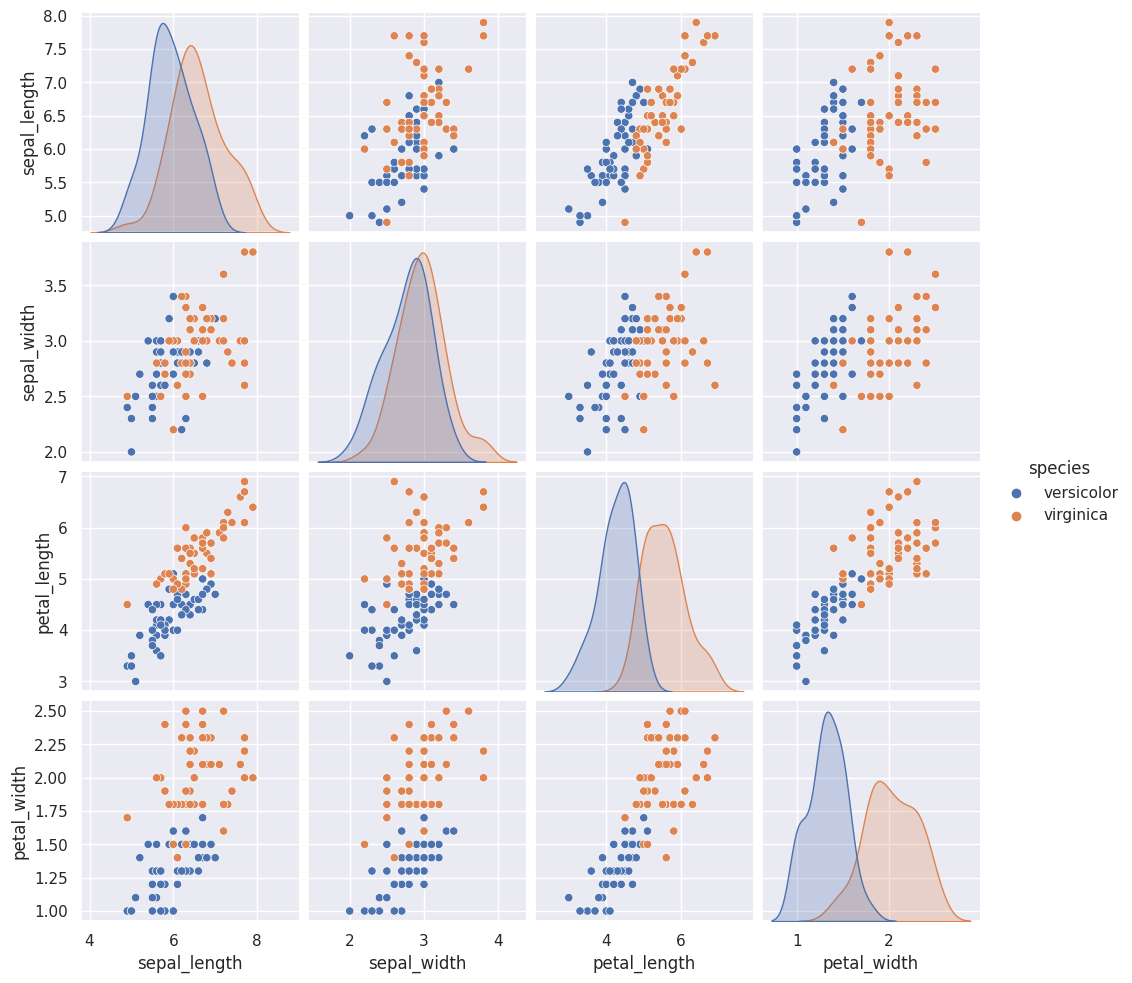

In [5]:
sns.pairplot(iris, hue='species', height=2.5);

For use in Scikit-Learn, we will extract the features matrix and target array from the seaborn dataframe and store them in numpy arrays

In [6]:
X_data = iris.drop('species', axis=1)
X_data = X_data.to_numpy()
X_data.shape


(100, 4)

In [7]:
# create a numeric arrays for the 3 species
y_data = iris.species.replace({'setosa': 2, 'versicolor': 1, 'virginica': 0}, inplace=False)
y_data = y_data.to_numpy()
y_data.shape


(100,)

In [ ]:
## uncommend it if you want to try other data
# from sklearn.datasets import make_circles
# X_data, y_data = make_circles(100, factor=.8, noise=.3)

For my personal project, I'm exploring how to simplify complex data for better understanding. Specifically, I'm working with the Iris dataset, which includes four different features per sample. My goal is to make this data easier to visualize and interpret.

The main idea is to find a way to represent this data in fewer dimensions without losing its important characteristics. Visualizing data in two dimensions is way simpler than in four or more, right?

I'm using a technique called principal component analysis (PCA), known for its efficiency in reducing dimensions while preserving key data aspects. The plan is to transform the Iris data into a two-dimensional format using PCA.

My project involves using PCA to transform the Iris dataset into a 2D form, making it more accessible for visualization and analysis.

In [9]:
# X_data_2D = X_data[:,1:3]
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_data_2D = pca.fit_transform(X_data)

The way I reduced the dimensionality of this given dataset was by using the pca class of the sklearn.decomposition libary and simply changed the parametes of n_components to 2 representing the amount of dimensions that I want and updated X_data using the fit_transform method.

---
##PCA

In [10]:
def mypca(X, k=2):
    Xk = X

    # implement PCA
    # Center around the origin
    X_mean = np.mean(X, axis=0)
    X_centered = X - X_mean

    # Get the covariance matrix
    covariance = np.cov(X_centered.T)

    # Get the eigenvectors and eigenvalues
    eigenvalues, eigenvectors = np.linalg.eig(covariance)

    # Sort the eigenvectors based on the magnitude
    eigenvectors = eigenvectors[:, np.argsort(-eigenvalues)]
    eigenvalues = eigenvalues[np.argsort(-eigenvalues)]

    # select top k eigenvectors
    eigenvectors_k = eigenvectors[:, :k]

    # project data onto the k-dimensional space
    Xk = X_centered.dot(eigenvectors_k)
    return Xk

In [11]:
Xk = mypca(X_data, k=2)

print(Xk[0:4,:])
print('--')
print(X_data_2D[0:4,:])
print('--')
# the value below should be close to 0
print(np.sum(Xk-X_data_2D))

[[ 0.23000653  0.79246422]
 [-0.22029451  0.34809451]
 [ 0.33647186  0.59107214]
 [-1.32483876 -0.08256375]]
--
[[ 0.23000653 -0.79246422]
 [-0.22029451 -0.34809451]
 [ 0.33647186 -0.59107214]
 [-1.32483876  0.08256375]]
--
-1.0658141036401503e-14


The way I reduced the dimensionality of this given dataset was by first centering the data to then get a accurate covariance matrix that reflects the true relationships between the variables. Then I found the eigenvector and eigenvalues and sorted the eigenvalues in descending order of their corresponding eigenvalues and then selected the top k eigenvector to retain the k dimensions that explain the most variance in the data and updated Xk.

---
## Plotting
Now let's plot the results. We see that in the two-dimensional representation, the species are fairly well separated, even though the PCA algorithm had no knowledge of the species labels!
This indicates to us that a relatively straightforward classification will probably be effective on the dataset, as we saw before.

In the following we split the dataset into a training set and a test set and plot them.

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data_2D, y_data, random_state=1)

<ipython-input-13-9dc49da2879c>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,1,1)


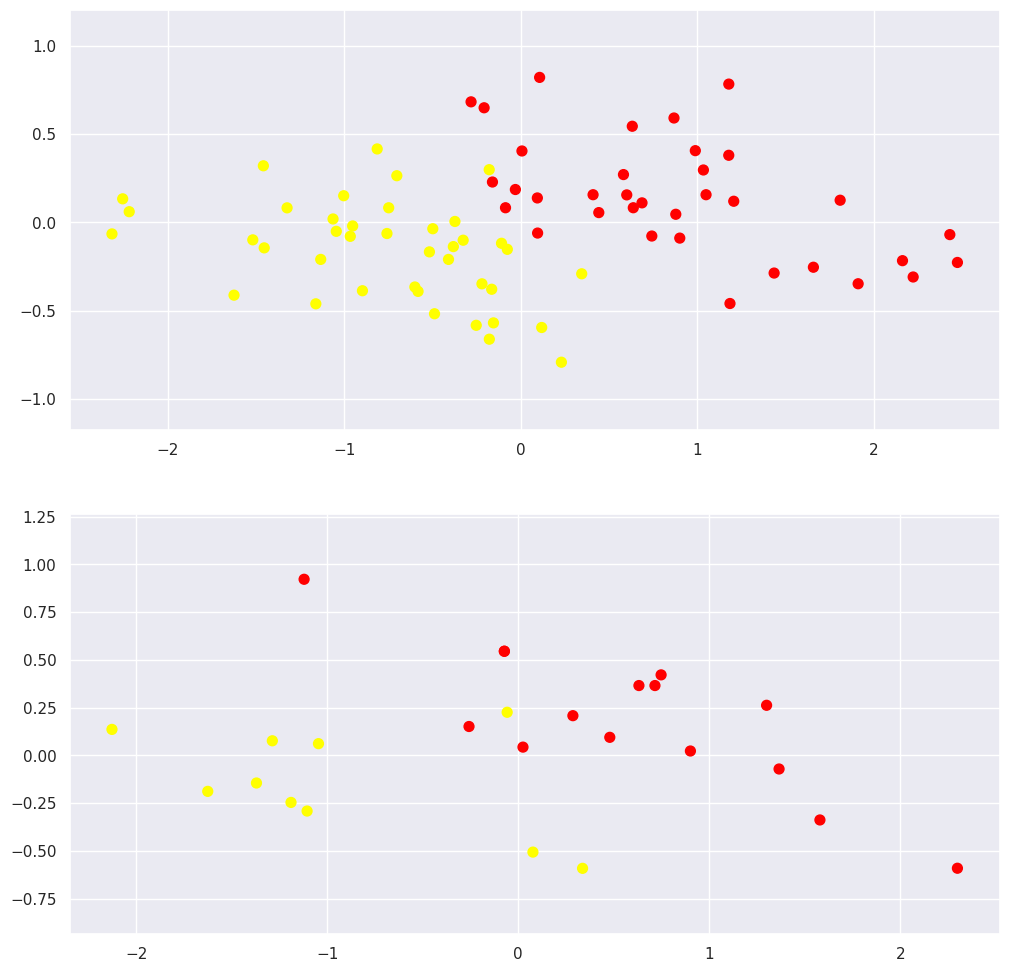

In [13]:
plt.subplots(figsize=(12, 12))
plt.subplot(2,1,1)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=50, cmap='autumn')
plt.axis('equal')
plt.subplot(2,1,2)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=50, cmap='autumn')
plt.axis('equal')
plt.show()

---
## Decision Tree Classifier

This process of fitting a decision tree to our data can be done in Scikit-Learn with the ``DecisionTreeClassifier`` estimator.

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_data_2D, y_data, test_size=0.2, random_state=42)

# Define the parameter grid
param_grid = {'max_depth': [2, 4, 6, 8, 10], 'min_samples_leaf': [1, 2, 3, 4, 5]}

# Create a decision tree classifier
tree = DecisionTreeClassifier()

# Create the grid seach
grid_tree = GridSearchCV(tree, param_grid, cv=10)

# Fit the grid search to the data
grid_tree.fit(X_train, y_train)

# Find the best parameters and best scores from the grid search
best_paramaters = grid_tree.best_params_
best_score = grid_tree.best_score_

# Create a decision tree classifier with the best parameters
best_tree = DecisionTreeClassifier(max_depth=best_paramaters['max_depth'], min_samples_leaf=best_paramaters['min_samples_leaf'])

# Fit the classifier to the data
best_tree.fit(X_train, y_train)

# Update y_pred
y_pred = best_tree.predict(X_test)

Let's write a quick utility function to help us visualize the output of the classifier:

Now we can examine what the decision tree classification looks like, and compute the prediciton on the test set.

<ipython-input-15-f08523c71706>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,1,1)


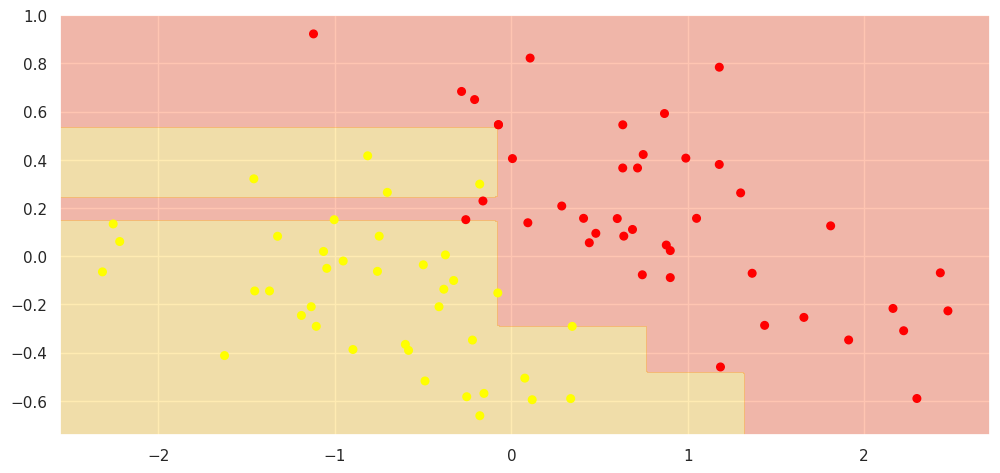

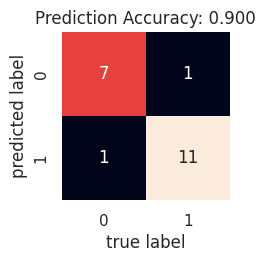

In [15]:
plt.subplots(figsize=(12, 12))
plt.subplot(2,1,1)
visualize_classifier(tree, X_train, y_train, cmap='autumn')
plt.show()

plt.subplot(2,1,2)
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title("Prediction Accuracy: %1.3f" %accuracy_score(y_test, y_pred));

The way I implemented the classifier was by first splitting the data into 80% training and 20% testing and then creating a decision tree classifier and using grid search to tune the paramaters max_depth and min_samples_leaf to get better accuracy. I used the best hyperparamets to create the new decision tree classifier and then fit it to to the data. After that I calculated the predictions.